Please copy the notebook to your drive and write your code in it.

# New section

Import necessary libraries

In [180]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder

Read Dataset from csv file

In [181]:
iris= pd.read_csv('/content/Iris.csv')

Preview dataset

In [182]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Declare feature vector 

In [183]:
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

Replace categorical data with numbers

In [184]:
pre_process = OrdinalEncoder()
iris['Species'] = pre_process.fit_transform(iris[['Species']])

Declare target variable

In [185]:
X = iris[features]
Y = iris[["Species"]]

Distribution for Classes related to Target Variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


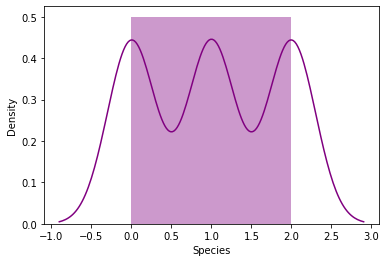

In [186]:
sns.distplot(iris["Species"],color='Purple')

Distribution for Features related to Iris Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


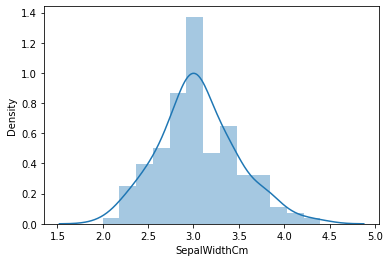

In [187]:
sns.distplot(X["SepalWidthCm"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


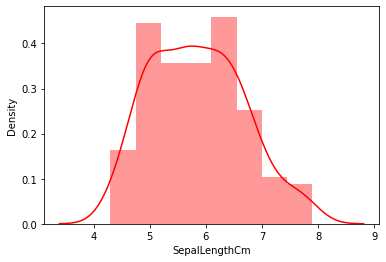

In [188]:
sns.distplot(X["SepalLengthCm"],color='Red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


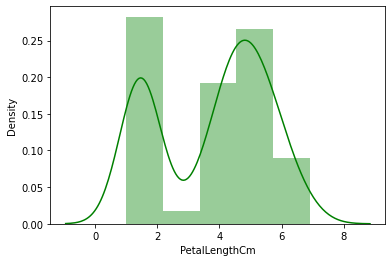

In [189]:
sns.distplot(X["PetalLengthCm"],color='Green')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


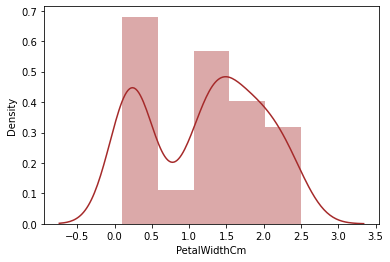

In [190]:
sns.distplot(X["PetalWidthCm"],color='Brown')

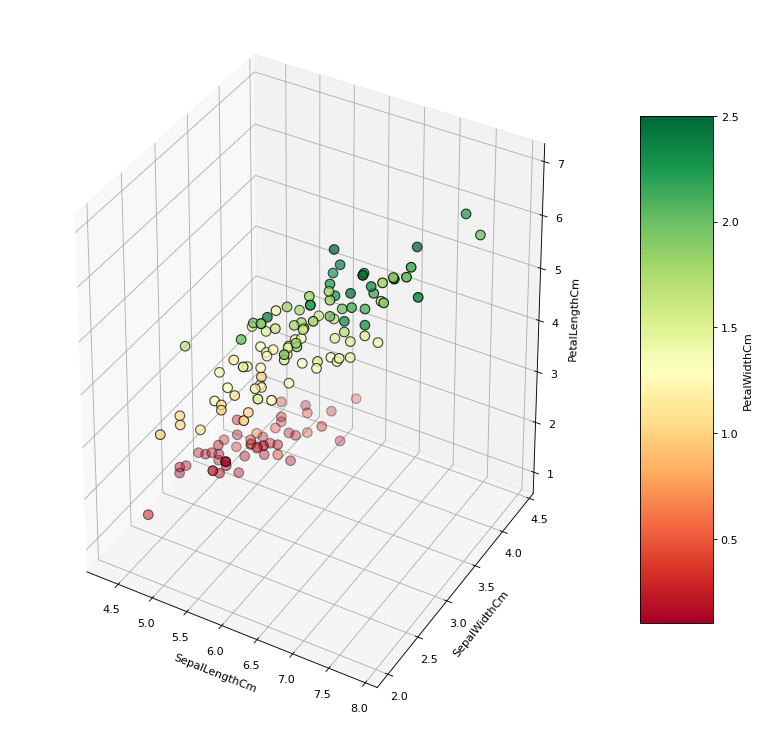

In [191]:
fig = plt.figure(figsize = (12, 12), dpi=80)
ax = fig.add_subplot(111, projection='3d')
pnt3d = ax.scatter3D(X[features[0]],X[features[1]],X[features[2]], c=X[features[3]], cmap="RdYlGn",s=75, edgecolors="black")
fig.colorbar(pnt3d, ax = ax, shrink = 0.7, aspect = 7,label = features[3]) 
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.set_xlabel(features[0])
ax.set_zlabel(features[2])
ax.set_ylabel(features[1])
plt.show()

Split data into train and test sets

In [192]:
iris = iris.sample(frac = 1)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
split=skf.split(X,Y)
for train_index, test_index in split:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

Base estimator(Decision Tree classifier) : a weak learner with max_depth=2

In [193]:
base_model = DecisionTreeClassifier(max_depth=2)

Fit weak classifier

In [194]:
base_model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Cross Validation for Weak Learner

In [195]:
weak_score = cross_val_score(base_model,X_train,Y_train.values.ravel(),cv = skf)
print(weak_score)
print(weak_score.mean())
print(weak_score.std())
print(weak_score.var())

[0.91666667 0.95833333 0.95833333 0.95833333 0.91666667]
0.9416666666666668
0.020412414523193187
0.00041666666666666816


Calculate the accuracy by the weak learner

In [196]:
Y_pred = base_model.predict(X_test)
print(str(accuracy_score(Y_test,Y_pred)*100)+"%")

96.66666666666667%


Build the AdaBoost model with the the above decision tree and by increasing the number of trees from 1 to 5 with a step of 1 in the lines:

Hint:   
estimators = list(range(1, 5, 1))
for n_est in estimators:



In [197]:
AdaBoost_Models = []
cross_val = []
cv_mean=[]
cv_std=[]
cv_var=[]
for i in range (1,6):
  AdaBoost_Models.append(AdaBoostClassifier(base_estimator = base_model , n_estimators=i).fit(X_train,Y_train.values.ravel()))
  cross_val.append(cross_val_score(AdaBoost_Models[i-1],X_train,Y_train.values.ravel(),cv = skf))
  cv_mean.append(cross_val[i-1].mean())
  cv_std.append(cross_val[i-1].std())
  cv_var.append(cross_val[i-1].var())

cval = pd.DataFrame({"Number of Weak Learners":[1,2,3,4,5],"Mean":cv_mean,"Standard Deviation":cv_std,"Variance":cv_var})
cval.style

,Number of Weak Learners,Mean,Standard Deviation,Variance
0,1,0.950000,0.031180,0.000972
1,2,0.933333,0.020412,0.000417
2,3,0.933333,0.020412,0.000417
3,4,0.916667,0.045644,0.002083
4,5,0.941667,0.020412,0.000417


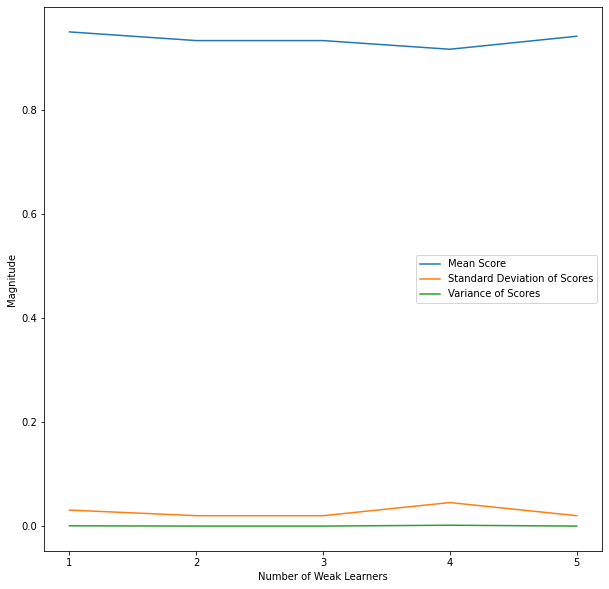

In [198]:
plt.figure(figsize=(10,10))
plt.plot([1,2,3,4,5],cv_mean,label='Mean Score')
plt.plot([1,2,3,4,5],cv_std,label='Standard Deviation of Scores')
plt.plot([1,2,3,4,5],cv_var,label='Variance of Scores')
plt.legend()
plt.xticks([1,2,3,4,5])
plt.xlabel("Number of Weak Learners")
plt.ylabel("Magnitude")
plt.show()

Plot the model performance

In [199]:
test_acc=[]
c=1
val = pd.DataFrame({'Classes':['Iris-setosa','Iris-versicolor','Iris-virginica']})
for j in AdaBoost_Models:
  y = j.predict(X_test)
  val['AdaBoost_Model_'+str(c)] = pd.Series([list(y).count(i) for i in set(y)])
  c+=1
  test_acc.append(str(accuracy_score(Y_test,j.predict(X_test))*100)+"%")
val['Actual'] = pd.Series(list(Y_test['Species']).count(ii) for ii in [0.0,1.0,2.0])
print(test_acc)
val.style

['96.66666666666667%', '100.0%', '96.66666666666667%', '96.66666666666667%', '96.66666666666667%']


,Classes,AdaBoost_Model_1,AdaBoost_Model_2,AdaBoost_Model_3,AdaBoost_Model_4,AdaBoost_Model_5,Actual
0,Iris-setosa,10,10,10,10,10,10
1,Iris-versicolor,11,10,11,11,11,10
2,Iris-virginica,9,10,9,9,9,10


Differences in Predictions for Test SubPortion

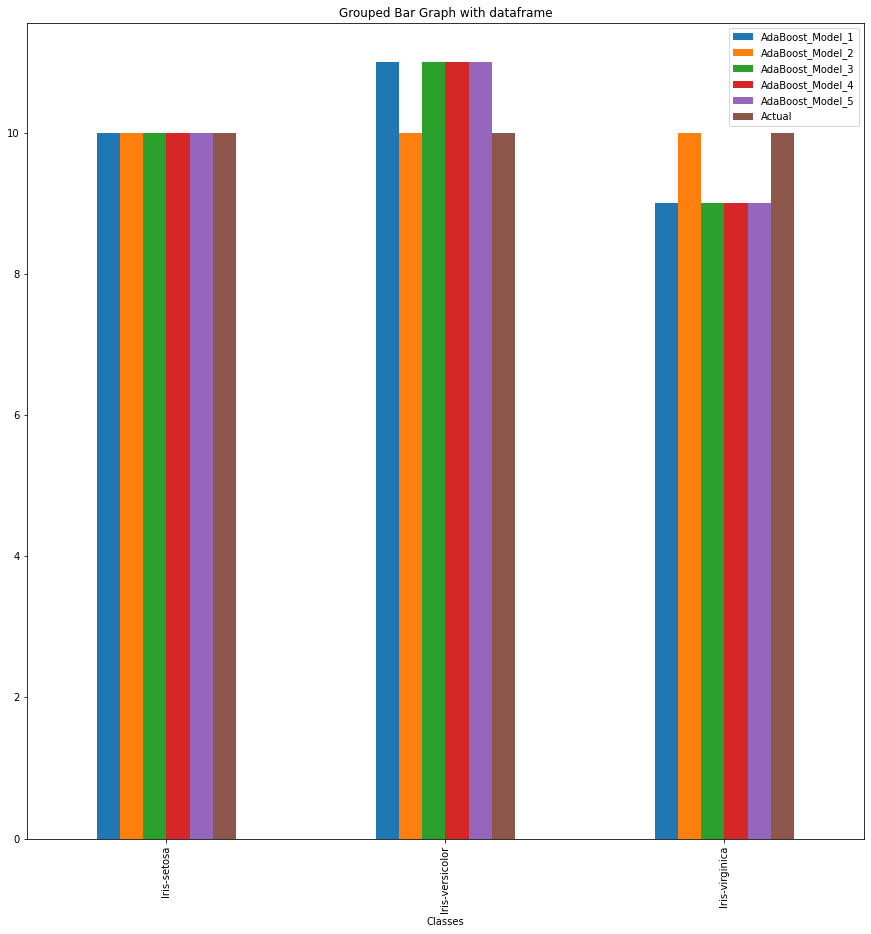

In [200]:
val.plot(x='Classes',kind='bar',stacked=False,title='Grouped Bar Graph with dataframe',figsize = (15,15))

#Bayes Classfication

# New Section

Import modules

In [201]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB

from sklearn import datasets
from sklearn.metrics import roc_curve,auc
from scipy import interp
from itertools import cycle

Naive Bayes algorithm using 5-fold cross validation 


In [202]:
g = GaussianNB()
m = MultinomialNB()
c = ComplementNB()
b = BernoulliNB()

g.fit(X_train,Y_train.values.ravel())
m.fit(X_train,Y_train.values.ravel())
c.fit(X_train,Y_train.values.ravel())
b.fit(X_train,Y_train.values.ravel())

gv = cross_val_score(g,X_train,Y_train.values.ravel(),cv=5)
mv = cross_val_score(m,X_train,Y_train.values.ravel(),cv=5)
cv = cross_val_score(c,X_train,Y_train.values.ravel(),cv=5)
bv = cross_val_score(b,X_train,Y_train.values.ravel(),cv=5)

gy = g.predict(X_test)
my = m.predict(X_test)
cy = c.predict(X_test)
by = b.predict(X_test)

gg=g.score(X_test,Y_test)
mm=m.score(X_test,Y_test)
cc=c.score(X_test,Y_test)
bb=b.score(X_test,Y_test)

val_2 = pd.DataFrame({'Classes':['Iris-setosa','Iris-versicolor','Iris-virginica']})
val_3 = pd.DataFrame({"Naive_Bayes_Models":["Gaussian","Multinomial","Complement","Bernoulli"],"Cross-Validation Score Array":[list(gv),list(mv),list(cv),list(bv)],"Mean":[gv.mean(),mv.mean(),cv.mean(),bv.mean()],"Standard Deviation":[gv.std(),mv.std(),cv.std(),bv.std()],"Variance":[gv.var(),mv.var(),cv.var(),bv.var()],"Test Accuracy":[gg,mm,cc,bb]})
val_3.style

,Naive_Bayes_Models,Cross-Validation Score Array,Mean,Standard Deviation,Variance,Test Accuracy
0,Gaussian,"[0.9583333333333334, 1.0, 0.875, 0.9166666666666666, 1.0]",0.950000,0.048591,0.002361,0.966667
1,Multinomial,"[1.0, 0.9583333333333334, 0.9583333333333334, 0.875, 1.0]",0.958333,0.045644,0.002083,0.966667
2,Complement,"[0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]",0.666667,0.000000,0.000000,0.666667
3,Bernoulli,"[0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333]",0.333333,0.000000,0.000000,0.333333


Plot the ROC AUC curve

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


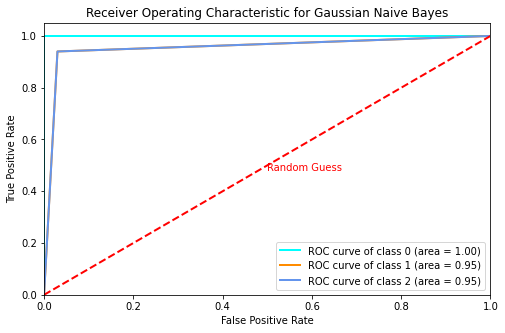

In [211]:
iris = datasets.load_iris()
x = iris.data[:, 2:]
y = iris.target
x_test = x
y_test = y
n_classes=3

model=GaussianNB()
model.fit(x,y)
nb=model.score(x,y)

pred1=model.predict(x_test)
t1=sum(x==0 for x in pred1-y_test)/len(pred1)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

lw=2
plt.figure(figsize=(8,5))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


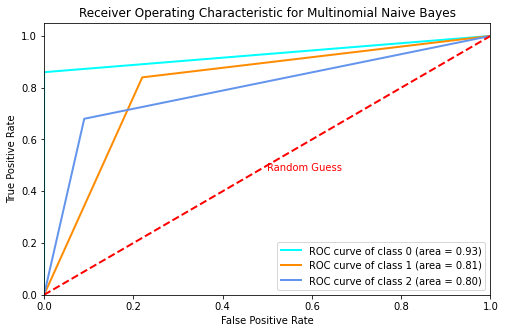

In [212]:
model=MultinomialNB()
model.fit(x,y)
nb=model.score(x,y)

pred1=model.predict(x_test)
t1=sum(x==0 for x in pred1-y_test)/len(pred1)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

lw=2
plt.figure(figsize=(8,5))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multinomial Naive Bayes')
plt.legend(loc="lower right")
plt.show()

Use logarithmic discriminant function to compute accuracy

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X_tr,X_te,Y_tr,Y_te = train_test_split(X,Y,test_size = 0.2)
model = LDA()
model.fit(X_tr,Y_tr.values.ravel())
lv = cross_val_score(model,X_tr,Y_tr.values.ravel(),cv=5)
print(lv)
print(lv.mean())
print(lv.std())
print(lv.var())
print(model.score(X_te,Y_te))

[0.95833333 0.91666667 0.95833333 1.         1.        ]
0.9666666666666668
0.031180478223116186
0.0009722222222222227
1.0


In [206]:
val_2['Gaussian_Naive_Bayes'] = pd.Series([list(gy).count(iii) for iii in set(gy)])
val_2['Multinomial_Naive_Bayes'] = pd.Series([list(my).count(iii) for iii in set(my)])
val_2['Complement_Naive_Bayes'] = pd.Series([list(cy).count(iii) for iii in set(cy)])
val_2['Bernoulli_Naive_Bayes'] = pd.Series([list(by).count(iii) for iii in set(by)])
val_2['LDA'] = pd.Series([list(model.predict(X_te)).count(iii) for iii in set(y)])
val_2 = val_2.fillna(0)
val_2.style

,Classes,Gaussian_Naive_Bayes,Multinomial_Naive_Bayes,Complement_Naive_Bayes,Bernoulli_Naive_Bayes,LDA
0,Iris-setosa,10,10,10.000000,30.000000,10
1,Iris-versicolor,9,11,20.000000,0.000000,14
2,Iris-virginica,11,9,0.000000,0.000000,6


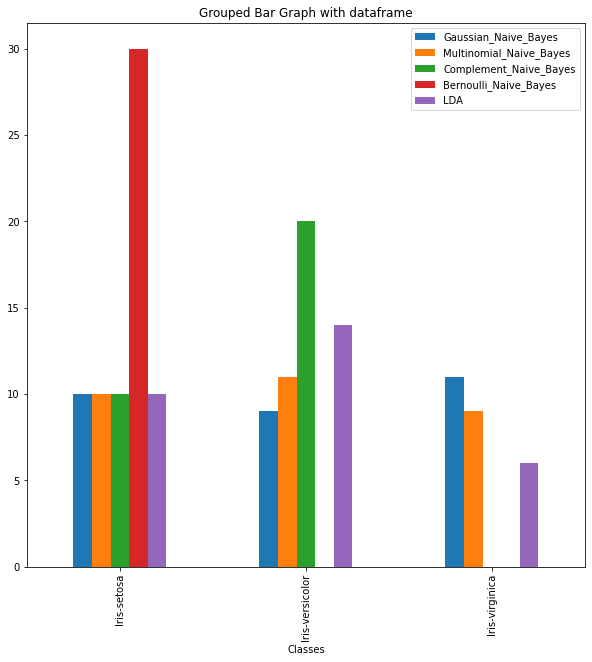

In [210]:
val_2.plot(x='Classes',kind='bar',stacked=False,title='Grouped Bar Graph with dataframe',figsize = (10,10))

Bayes risk

In [208]:
gc = g.predict_proba(X_test)
mc = m.predict_proba(X_test)
cc = c.predict_proba(X_test)
bc = b.predict_proba(X_test)
lc = model.predict_proba(X_te)
lis_given =[]
lis_basic =[]
lam = np.array([[1,2,3],[4,5,6],[7,8,9]])
lim = np.array([[0,1,1],[1,0,1],[1,1,0]])
for i in [gc,mc,cc,bc,lc] :
  lis_given.append(np.sum(np.dot(i,lam.T),axis=0).sum())
  lis_basic.append(np.sum(np.dot(i,lim.T),axis=0).sum())

print(lis_given)
print(lis_basic)

[451.6251251224709, 457.7253379460528, 448.49743025315956, 450.0, 438.08732986626353]
[59.999999999999986, 59.999999999999986, 60.00000000000001, 60.0, 60.0]


[Decision Tree](https://https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Adaboost Explaination](https://https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe)

[Adaboost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

[Naive Bayes](https://https://scikit-learn.org/stable/modules/naive_bayes.html)


[Bayes Risk](https://drive.google.com/file/d/14oDBVaOWt6y5kSceIPLK59v3iNu9PjWb/view)

[Discriminant function](https://drive.google.com/file/d/1ggLEGpgcwEen1lec5VW1Gqjp9nQI0-rM/view)

[Discriminant function analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)




